In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

url = "https://raw.githubusercontent.com/DuvanSGF/Coronavirus-Data_Science_Fundamentals/master/Datasets/covidacumulado.csv"
data = pd.read_csv(url)  # load data set


In [14]:
# Imprimimos los Datos
data

,dia,contagiados
0,1,1
1,2,1
2,3,1
3,4,3
4,5,3
5,6,9
6,7,13
7,8,16
8,9,24
9,10,45


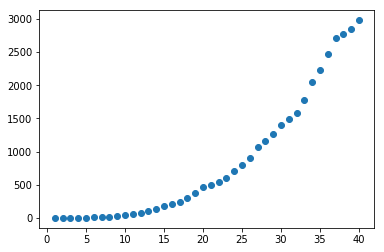

In [15]:
x = data['dia'].values.reshape(-1, 1) # necesitamos un array de 2D para SkLearn
y = data['contagiados'].values.reshape(-1, 1)
plt.scatter(x,y)

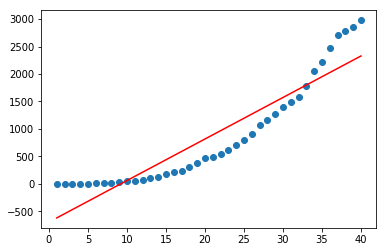

In [16]:
# Ajuste a un modelo lineal
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

In [ ]:
# No parece que el modelo lineal se ajuste demasiado bien. 
# Una forma de medir la bondad del ajuste es calcular la 
# media de la raíz del error cuadrático (root mean square error) 
# que nos da una medida del error cometido por el modelo. 
# En concreto se calcula la media de la desviación de los valores estimados. 
# Otra métrica interesante es la medida R2 (R cuadrado), cuyo valor 
# está entre 0 y 1, lo que la hace mejor a la hora 
# de interpretar su valor, y es la fracción de la suma total de 
# cuadrados que se 'explica por' la regresión.

In [18]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 358.43071251696904
R2: 0.8558660267804269


In [ ]:
# Si nos fijamos, sobre todo en R2, vemos que el ajuste no es bueno 
# (mientras más cercano a 1, mejor ajuste). Estaremos de acuerdo en 
# que una curva se ajustaría mejor. Si queremos ajustar una curva a 
# los datos tendremos que trabajar con más dimensiones. 
# Es decir, tendremos que intentar ajustar un polinomio 
# (de segundo grado, por ejemplo). 
# Para ello fijémonos en la ecuación de la recta que hemos ajustado con la regresión lineal. y=a+bx
# 

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print(x)
print(x_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]]
[[1.000e+00 1.000e+00]
 [2.000e+00 4.000e+00]
 [3.000e+00 9.000e+00]
 [4.000e+00 1.600e+01]
 [5.000e+00 2.500e+01]
 [6.000e+00 3.600e+01]
 [7.000e+00 4.900e+01]
 [8.000e+00 6.400e+01]
 [9.000e+00 8.100e+01]
 [1.000e+01 1.000e+02]
 [1.100e+01 1.210e+02]
 [1.200e+01 1.440e+02]
 [1.300e+01 1.690e+02]
 [1.400e+01 1.960e+02]
 [1.500e+01 2.250e+02]
 [1.600e+01 2.560e+02]
 [1.700e+01 2.890e+02]
 [1.800e+01 3.240e+02]
 [1.900e+01 3.610e+02]
 [2.000e+01 4.000e+02]
 [2.100e+01 4.410e+02]
 [2.200e+01 4.840e+02]
 [2.300e+01 5.290e+02]
 [2.400e+01 5.760e+02]
 [2.500e+01 6.250e+02]
 [2.600e+01 6.760e+02]
 [2.700e+01 7.290e+02]
 [2.800e+01 7.840e+02]
 [2.900e+01 8.410e+02]
 [3.000e+01 9.000e+02]
 [3.100e+01 9.610e+02]
 [3.200e+01 1.024e+03]
 [3.300e+01 1.089e+03]


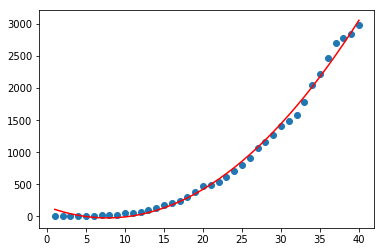

RMSE: 65.39543544236068
R2: 0.995202104337721


In [25]:
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
     
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='r')
    plt.show()
     
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    print ('RMSE: ' + str(rmse))
    print ('R2: ' + str(r2))

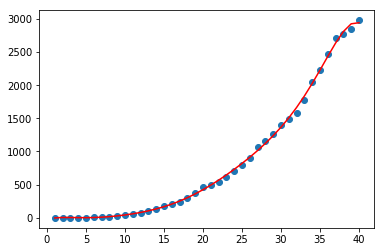

RMSE: 31.455824041863654
R2: 0.9988899103306221


In [29]:
    poly = PolynomialFeatures(degree=8, include_bias=False)
    x_poly = poly.fit_transform(x)
     
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
     
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='r')
    plt.show()
     
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    print ('RMSE: ' + str(rmse))
    print ('R2: ' + str(r2))